# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime 
import pytz
import json
import ast

# Data Preparation

In [2]:
%run descriptive_analytics_preparation.ipynb

# Task

Demonstrate how the number of charging events varies during the day, the week and between seasons.
What patterns can you observe, and how do you explain them?

# Variatons - during the day 

**1. Number of sessions started per hour of the day**

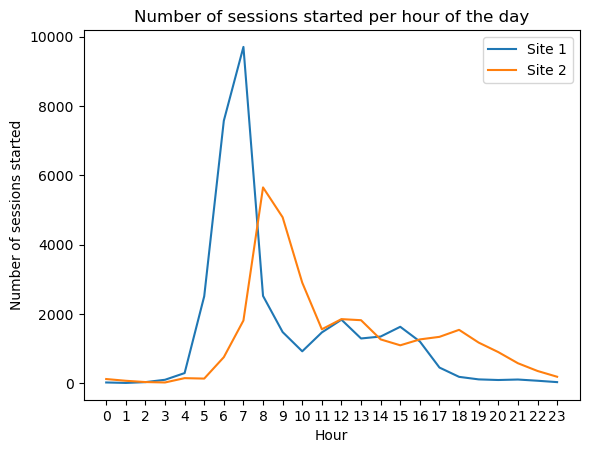

In [27]:
x = np.arange(24)
y1 = df1_grouped_hour[["sessionID"]].size()
y2 = df2_grouped_hour[["sessionID"]].size()

plt.plot(x, y1, label="Site 1")
plt.plot(x, y2, label="Site 2")
plt.xlabel("Hour")
plt.ylabel("Number of sessions started")
plt.xticks(x)
plt.title("Number of sessions started per hour of the day")
plt.legend()

plt.show()

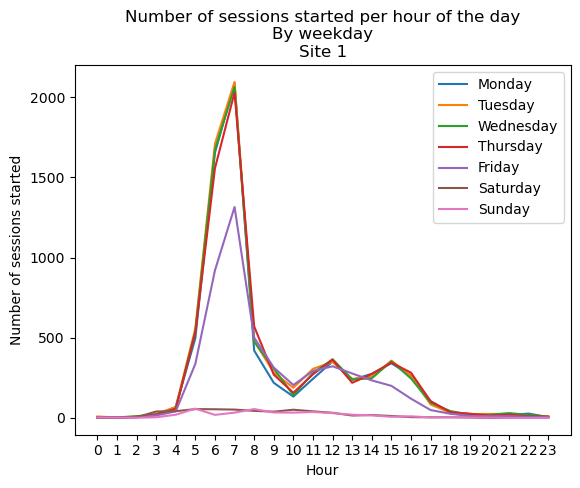

In [28]:
x = np.arange(24)
y_list = [0]*7

for w in range(0,7):
    y_list[w] = df1[df1.weekday == w].groupby("hour")[["hour"]].size()
    try:
        plt.plot(x, y_list[w], label=weekdays[w])
    except Exception:
        for i in range(0, 24):
            if i not in y_list[w].keys():
                y_list[w][i] = 0
        plt.plot(x, y_list[w], label=weekdays[w])

plt.xlabel("Hour")
plt.ylabel("Number of sessions started")
plt.xticks(x)
plt.title("Number of sessions started per hour of the day" + "\n" + "By weekday" + "\n" + "Site 1")
plt.legend()

plt.show()

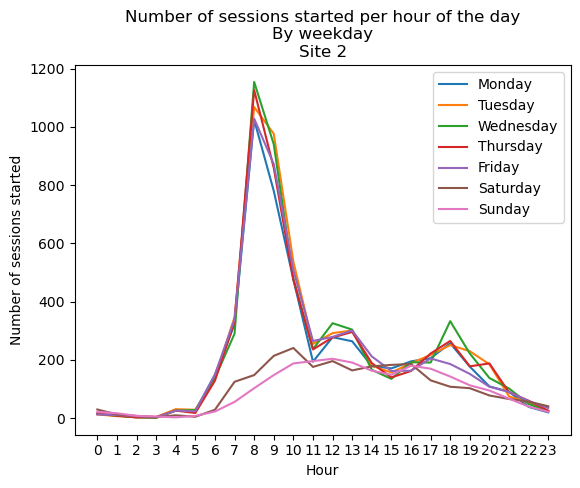

In [29]:
x = np.arange(24)
y_list = [0]*7

for w in range(0,7):
    y_list[w] = df2[df2.weekday == w].groupby("hour")[["hour"]].size()
    try:
        plt.plot(x, y_list[w], label=weekdays[w])
    except Exception:
        for i in range(0, 24):
            if i not in y_list[w].keys():
                y_list[w][i] = 0
        plt.plot(x, y_list[w], label=weekdays[w])

plt.xlabel("Hour")
plt.ylabel("Number of sessions started")
plt.xticks(x)
plt.title("Number of sessions started per hour of the day" + "\n" + "By weekday" + "\n" + "Site 2")
plt.legend()

plt.show()

**2. Ongoing sessions per hour of the day**

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


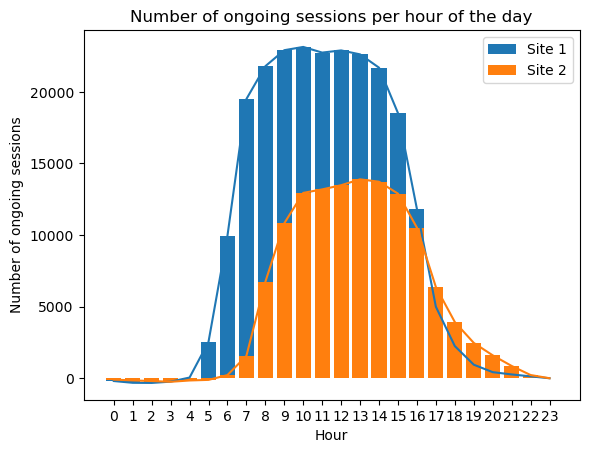

In [30]:
x = np.arange(24)
y1_start = df1_grouped_hour[["hour"]].size()
y2_start = df2_grouped_hour[["hour"]].size()
y1_end = df1_grouped_hour_disconnect[["hour_disconnect"]].size()
y2_end = df2_grouped_hour_disconnect[["hour_disconnect"]].size()
y1_start_cumsum = y1_start.cumsum()
y1_end_cumsum = y1_end.cumsum()
y1_com = y1_start_cumsum.sub(y1_end_cumsum)
y2_start_cumsum = y2_start.cumsum()
y2_end_cumsum = y2_end.cumsum()
y2_com = y2_start_cumsum.sub(y2_end_cumsum)

print(  type(y1_start), 
        type(y1_end),
        type(y1_start_cumsum),
        type(y1_end_cumsum),
        type(y1_com)
        )

plt.plot(x, y1_com)
plt.bar(x, y1_com, label="Site 1")
plt.plot(x, y2_com)
plt.bar(x, y2_com, label="Site 2")

plt.xlabel("Hour")
plt.ylabel("Number of ongoing sessions")
plt.xticks(x)
plt.title("Number of ongoing sessions per hour of the day")
plt.legend()

plt.show()

**3. Average connection duration of sessions started per hour of the day**

In [7]:
# Statistics for the connection duration per hour of the day
df1_grouped_hour_statistics =  df1_grouped_hour["connectionDuration"].describe()
df2_grouped_hour_statistics =  df2_grouped_hour["connectionDuration"].describe()

Insights: <br><br> 
Site 1
- Relatively long duration of sessions started from 4am to 8am (on average 8-9 hours) --> Characteristic for a typical work day, indicating commercial use of site 1 <br>

Site 2
- Compared to site 1, relatively long duration of sessions started from 8pm to midnight --> Characteristic for a night of sleep, indicating private use


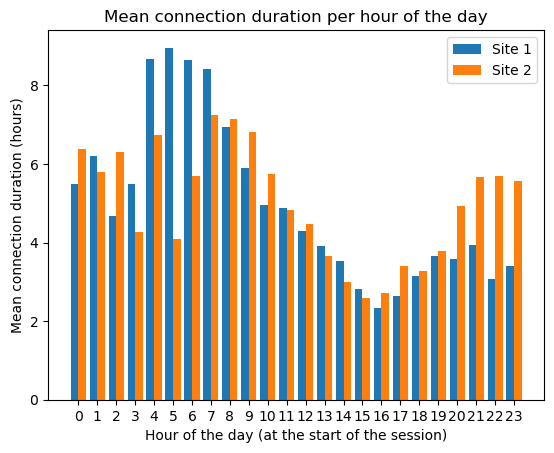

In [8]:
# Bar Charts plotting the mean connection duration per hour of the day
x = np.arange(24)
y1 = df1_grouped_hour_statistics["mean"]
y2 = df2_grouped_hour_statistics["mean"]

ax2 = plt.subplot()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Mean connection duration per hour of the day")
ax2.set_xlabel("Hour of the day (at the start of the session)")
ax2.set_xticks(x)
ax2.set_ylabel("Mean connection duration (hours)")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))

plt.show()


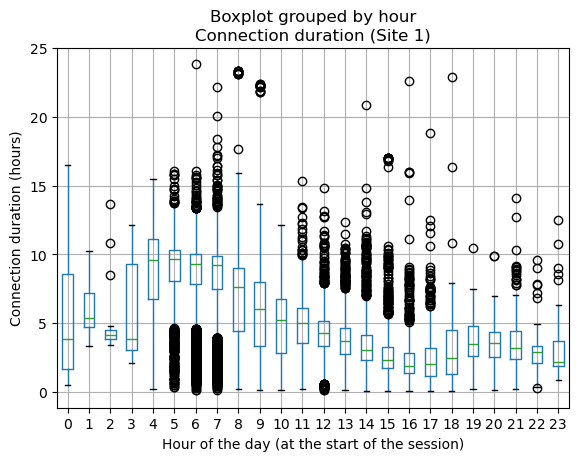

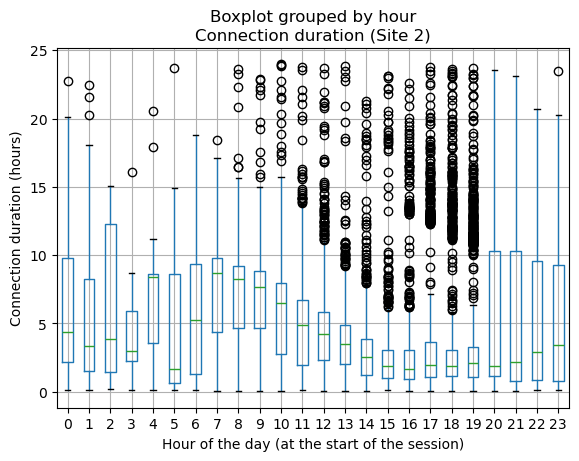

In [9]:
# Boxplots showing the average 25%, 50% and 75% marks of the connection durations per hour of the day
df1_connection_duration = df1[["hour", "connectionDuration"]]
df2_connection_duration = df2[["hour", "connectionDuration"]]

fig, ax3 = plt.subplots()
fig = df1_connection_duration.boxplot(ax=ax3, by="hour")
ax3.set_title("Connection duration (Site 1)")
ax3.set_xlabel("Hour of the day (at the start of the session)")
#ax3.set_xticklabels(weekdays, rotation=45)
ax3.set_ylabel("Connection duration (hours)")

fig, ax4 = plt.subplots()
fig = df2_connection_duration.boxplot(ax=ax4, by="hour")
ax4.set_title("Connection duration (Site 2)")
ax4.set_xlabel("Hour of the day (at the start of the session)")
#ax4.set_xticklabels(weekdays, rotation=45)
ax4.set_ylabel("Connection duration (hours)")

plt.show()


**4. Energy delivered per hour of the day**

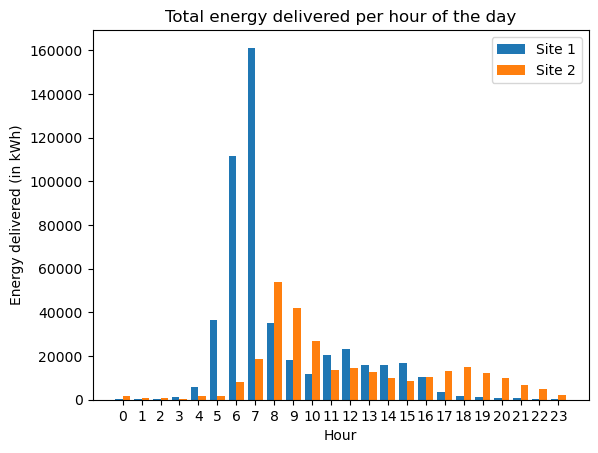

In [10]:
# Total energy delivered per hour of the day

x = np.arange(24)
y1 = df1_grouped_hour["kWhDelivered"].sum()
y2 = df2_grouped_hour["kWhDelivered"].sum()

thisPlot = plt.subplot()
thisPlot_y1 = thisPlot.bar(x-0.2, y1, width=0.4, align="center")
thisPlot_y2 = thisPlot.bar(x+0.2, y2, width=0.4, align="center")
thisPlot.set_xlabel("Hour")
thisPlot.set_ylabel("Energy delivered (in kWh)")
thisPlot.set_title("Total energy delivered per hour of the day")
thisPlot.set_xticks(x)
thisPlot.legend((thisPlot_y1, thisPlot_y2), ("Site 1", "Site 2"))

plt.show()

**5. Energy requested per hour of the day**

Based on the energy requested of sessions started per hour of the day <br><br>
NOTES: <br>
- kWhRequested data not available for all sessions
- Therefore the following plots/data is to be analyzed with caution  

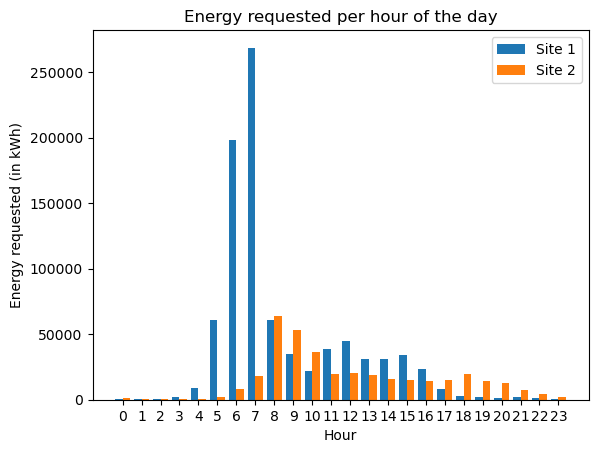

In [11]:
# Energy requested per hour of the day

x = np.arange(24)
y1 = df1_grouped_hour["kWhRequested"].sum()
y2 = df2_grouped_hour["kWhRequested"].sum()

thisPlot = plt.subplot()
thisPlot_y1 = thisPlot.bar(x-0.2, y1, width=0.4, align="center")
thisPlot_y2 = thisPlot.bar(x+0.2, y2, width=0.4, align="center")
thisPlot.set_xlabel("Hour")
thisPlot.set_ylabel("Energy requested (in kWh)")
thisPlot.set_title("Energy requested per hour of the day")
thisPlot.set_xticks(x)
thisPlot.legend((thisPlot_y1, thisPlot_y2), ("Site 1", "Site 2"))

plt.show()

NOTES: <br>
- Probably skewed by an outlier for Site 2 at 3am --> Check 

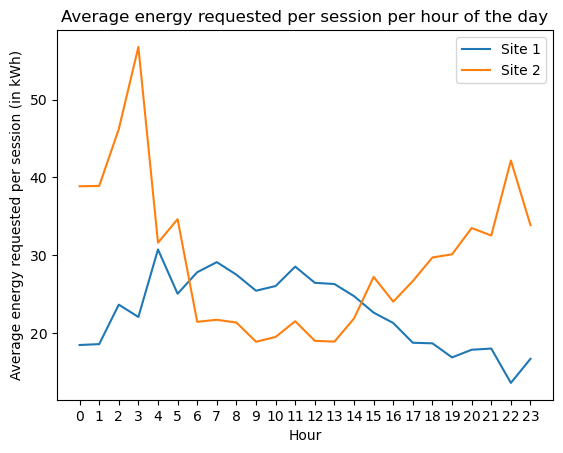

In [12]:
# Average energy requested per session per hour of the day

x = np.arange(24)
y1 = df1_grouped_hour["kWhRequested"].sum() / df1_grouped_hour["kWhRequested"].count()
y2 = df2_grouped_hour["kWhRequested"].sum() / df2_grouped_hour["kWhRequested"].count()

plt.plot(x, y1, label="Site 1")
plt.plot(x, y2, label="Site 2")
plt.title("Average energy requested per session per hour of the day")
plt.xlabel("Hour")
plt.ylabel("Average energy requested per session (in kWh)")
plt.xticks(x)
plt.legend()

plt.show()

# Variations - during the week

**Absolute number of sessions per weekday**

Insights:
- Generally more sessions on weekdays than the weekend
- Larger difference between weekdays & weekend for Site1, possibly indicating commercial usage

Notes:
- REMINDER: Number of sessions of Site 1 DOES NOT EQUAL Number of sessions of Site 2

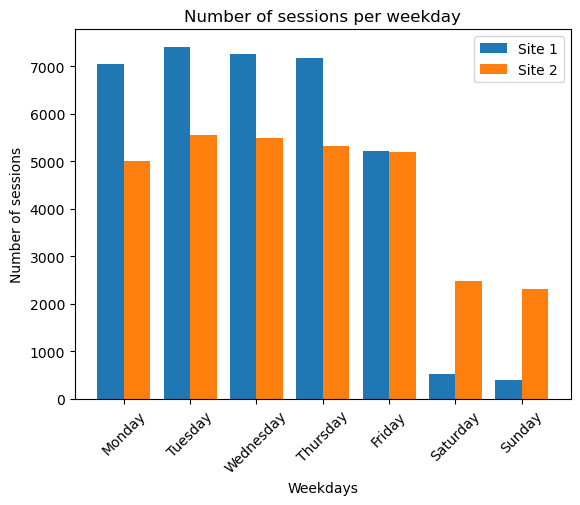

In [13]:
x = np.arange(len(weekdays))
y1 = df1_grouped_weekday.size()
y2 = df2_grouped_weekday.size()

ax1 = plt.subplot()
ax1_y1 = ax1.bar(x-0.2, y1, width=0.4, align="center")
ax1_y2 = ax1.bar(x+0.2, y2, width=0.4, align="center")

ax1.set_title("Number of sessions per weekday")
ax1.set_xlabel("Weekdays")
ax1.set_xticks(x)
ax1.set_xticklabels(weekdays, rotation=45)
ax1.set_ylabel("Number of sessions")
ax1.legend((ax1_y1, ax1_y2), ("Site 1", "Site 2"))

plt.show()

**Connection duration per weekday**

Notes:
- Why are there so many outliers in the boxplot for Site 2?
    - Connection duration indicates parking for up to a whole day (= 24 hours)
    - Possibly indication of higher rate of non-work related usage of Site 2

In [14]:
# Statistics for the connection duration per weekday
df1_grouped_weekday_statistics =  df1_grouped_weekday["connectionDuration"].describe()
df2_grouped_weekday_statistics =  df2_grouped_weekday["connectionDuration"].describe()
#print("Site 1", "\n\n", df1_grouped_weekday_statistics, "\n\n")
#print("Site 2" + "\n\n", df2_grouped_weekday_statistics, "\n\n")

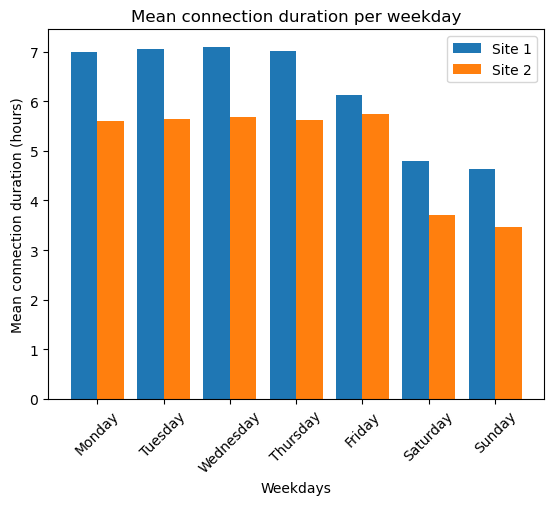

In [15]:
# Bar Charts plotting the mean connection duration per weekday
x = np.arange(len(weekdays))
y1 = df1_grouped_weekday_statistics["mean"]
y2 = df2_grouped_weekday_statistics["mean"]

ax2 = plt.subplot()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Mean connection duration per weekday")
ax2.set_xlabel("Weekdays")
ax2.set_xticks(x)
ax2.set_xticklabels(weekdays, rotation=45)
ax2.set_ylabel("Mean connection duration (hours)")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))

plt.show()


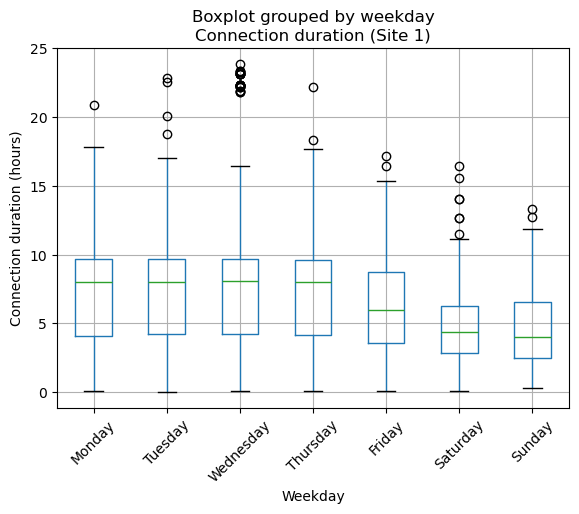

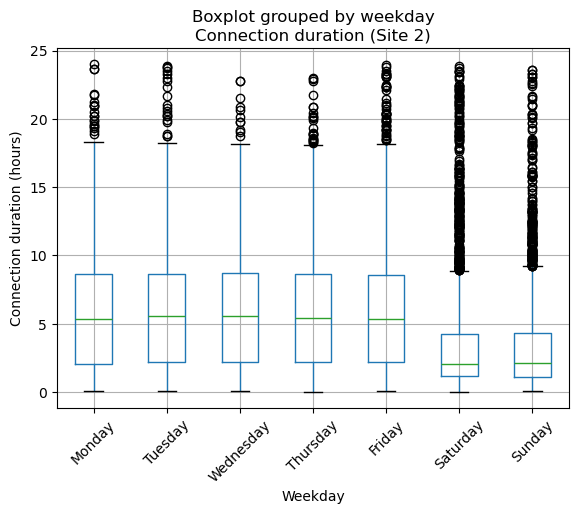

In [16]:
# Boxplots showing the average 25%, 50% and 75% marks of the connection durations per weekday
df1_connection_duration = df1[["weekday", "connectionDuration"]]
df2_connection_duration = df2[["weekday", "connectionDuration"]]

fig, ax3 = plt.subplots()
fig = df1_connection_duration.boxplot(ax=ax3, by="weekday")
ax3.set_title("Connection duration (Site 1)")
ax3.set_xlabel("Weekday")
ax3.set_xticklabels(weekdays, rotation=45)
ax3.set_ylabel("Connection duration (hours)")

fig, ax4 = plt.subplots()
fig = df2_connection_duration.boxplot(ax=ax4, by="weekday")
ax4.set_title("Connection duration (Site 2)")
ax4.set_xlabel("Weekday")
ax4.set_xticklabels(weekdays, rotation=45)
ax4.set_ylabel("Connection duration (hours)")

plt.show()


**Energy delivered per weekday**

Insights:
- Generally more energy delivered on weekdays than the weekend
- Larger difference between weekdays & weekend for Site 1, possibly indicating commercial usage

Notes:
- REMINDER: Number of sessions of & total energy delivered to  Site 1 DOES NOT EQUAL Number of sessions of & energy delivered to Site 2

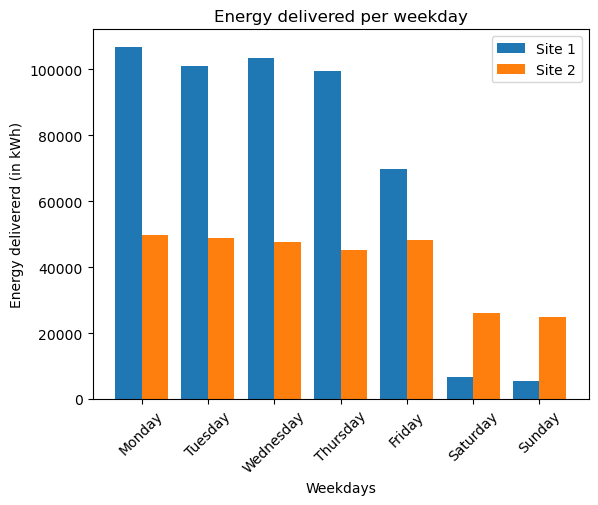

In [31]:
# Energy delivered per weekday

x = np.arange(len(weekdays))
y1 = df1_grouped_weekday["kWhDelivered"].sum()
y2 = df2_grouped_weekday["kWhDelivered"].sum()

ax2 = plt.subplot()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Energy delivered per weekday")
ax2.set_xlabel("Weekdays")
ax2.set_xticks(x)
ax2.set_xticklabels(weekdays, rotation=45)
ax2.set_ylabel("Energy delivererd (in kWh)")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))

plt.show()

# Variations - between seasons

**Number of sessions per month**

Notes:
- Plots do not yet account for the fact that some months occur 3 and others 4 times in the data set

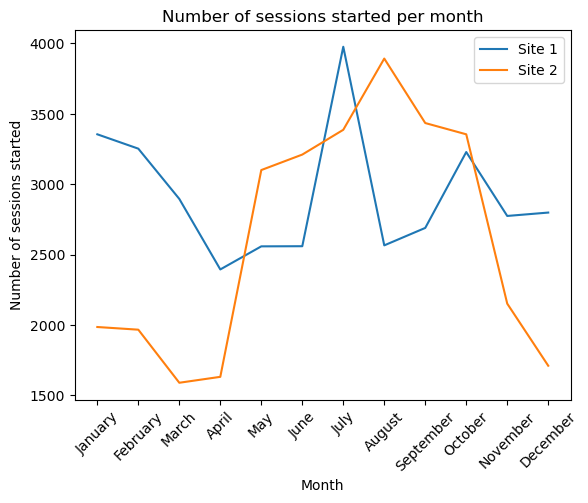

In [36]:
x = np.arange(len(months))
y1 = df1_grouped_month[["month"]].size()
y2 = df2_grouped_month[["month"]].size()

plt.plot(x, y1, label="Site 1")
plt.plot(x, y2, label="Site 2")
plt.xlabel("Month")
plt.ylabel("Number of sessions started")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.title("Number of sessions started per month")
plt.legend()

plt.show()

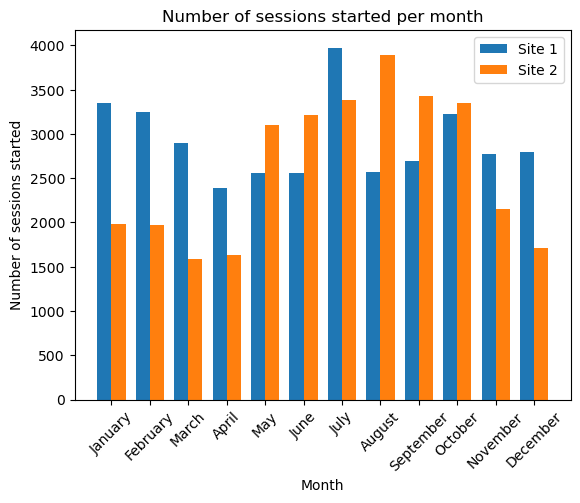

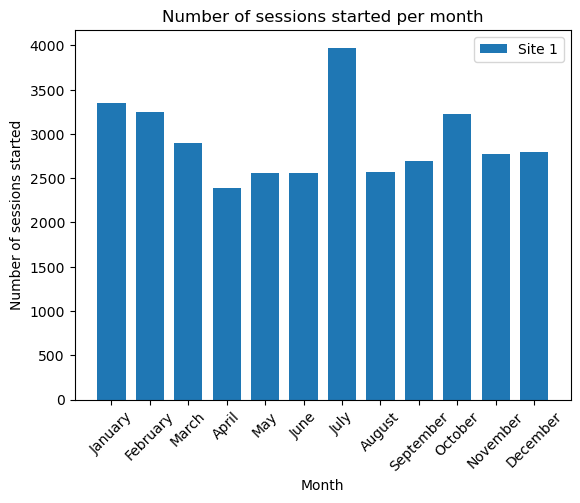

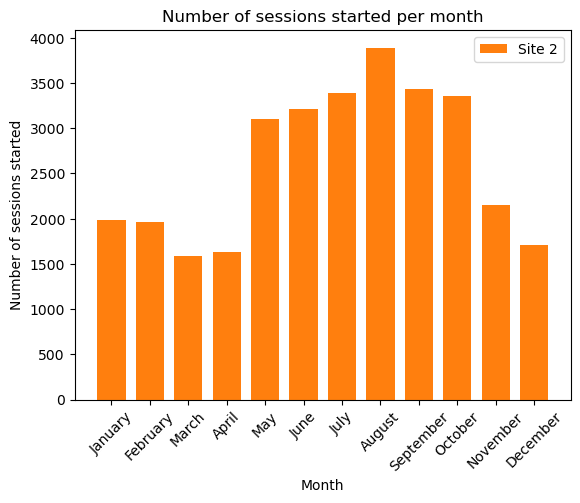

In [37]:
x = np.linspace(0,12,12)
y1 = df1_grouped_month[["month"]].size()
y2 = df2_grouped_month[["month"]].size()

# Show both sites together
ax2 = plt.subplot()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Number of sessions started per month")
ax2.set_xlabel("Month")
ax2.set_xticks(x)
ax2.set_xticklabels(months, rotation=45)
ax2.set_ylabel("Number of sessions started")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))
plt.show()

# Only show site 1
#plt.plot(x, y1)
plt.bar(x, y1, label="Site 1")
plt.xlabel("Month")
plt.ylabel("Number of sessions started")
plt.title("Number of sessions started per month")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.legend()
plt.show()

# Only show site 2
#plt.plot(x, y2)
plt.bar(x, y2, label="Site 2", color="tab:orange")
plt.xlabel("Month")
plt.ylabel("Number of sessions started")
plt.title("Number of sessions started per month")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.legend()
plt.show()



C:\Users\Felix\AppData\Local\Temp\ipykernel_35436\3878440457.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df1_single_months = df1.groupby(df1['connectionTime'].dt.to_period('M')).size()
C:\Users\Felix\AppData\Local\Temp\ipykernel_35436\3878440457.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2_single_months = df2.groupby(df2['connectionTime'].dt.to_period('M')).size()


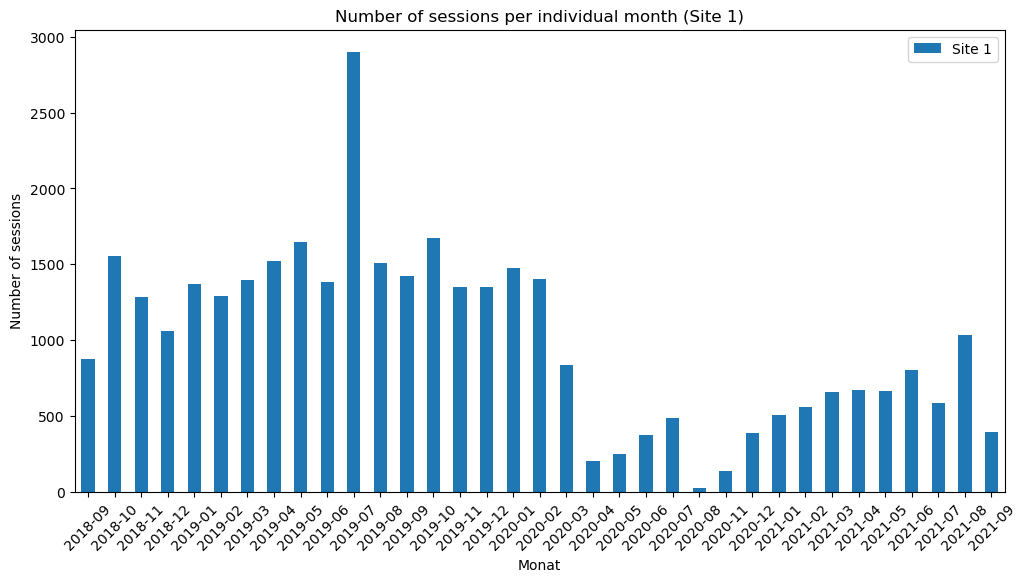

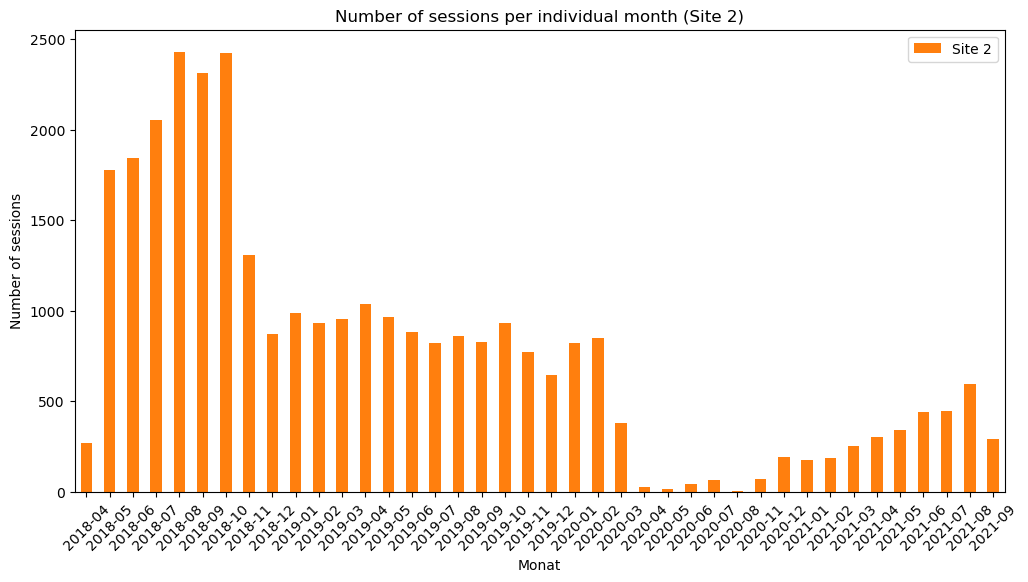

In [ ]:
df1_single_months = df1.groupby(df1['connectionTime'].dt.to_period('M')).size()
df2_single_months = df2.groupby(df2['connectionTime'].dt.to_period('M')).size()


df1_single_months.plot(kind='bar', figsize=(12, 6), label="Site 1")
plt.xlabel("Month")
plt.ylabel("Number of sessions")
plt.title("Number of sessions per individual month (Site 1)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

df2_single_months.plot(kind='bar', figsize=(12, 6), color="tab:orange", label="Site 2")
plt.xlabel("Month")
plt.ylabel("Number of sessions")
plt.title("Number of sessions per individual month (Site 2)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Energy delivered per (aggregated) month**

Insights:
- Site 1:
    - Generally more energy delivered in winter/colder months (october - march)
    - Outlier for the month of July with the most energy delivered of any month

- Site 2:
    - Generally more energy delivered in summer/warmer months (may - october)

NOTES:
- Investigate outlier in July for Site 1

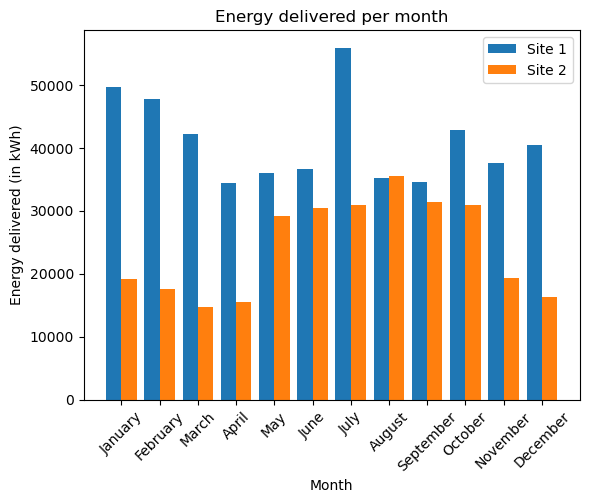

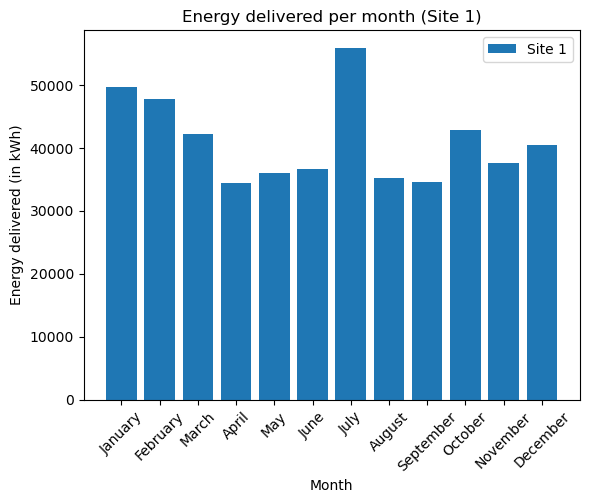

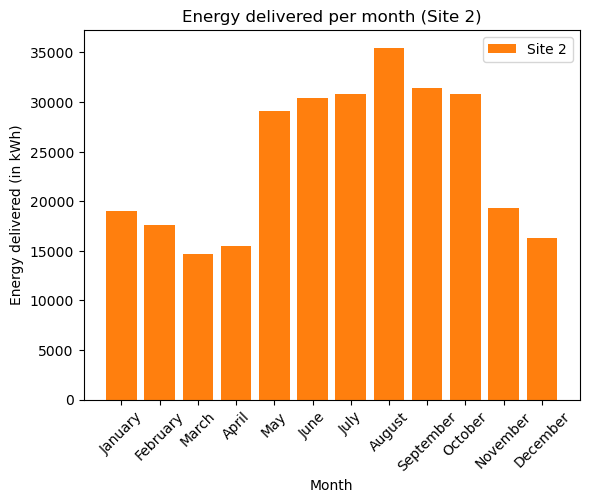

In [64]:
x = np.arange(len(months))
y1 = df1_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"]
y2 = df2_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"]

# Show both sites together
ax2 = plt.subplot()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Energy delivered per month")
ax2.set_xlabel("Month")
ax2.set_xticks(x)
ax2.set_xticklabels(months, rotation=45)
ax2.set_ylabel("Energy delivered (in kWh)")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))
plt.show()

# Only show site 1
#plt.plot(x, y1)
plt.bar(x, y1, label="Site 1")
plt.xlabel("Month")
plt.ylabel("Energy delivered (in kWh)")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.title("Energy delivered per month (Site 1)")
plt.legend()
plt.show()

# Only show site 2
#plt.plot(x, y2)
plt.bar(x, y2, label="Site 2", color="tab:orange")
plt.xlabel("Month")
plt.ylabel("Energy delivered (in kWh)")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.title("Energy delivered per month (Site 2)")
plt.legend()
plt.show()



**Energy delivered per (individual) month**

C:\Users\Felix\AppData\Local\Temp\ipykernel_35436\820068570.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df1_single_months = df1.groupby(df1['connectionTime'].dt.to_period('M'))["kWhDelivered"].sum()
C:\Users\Felix\AppData\Local\Temp\ipykernel_35436\820068570.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2_single_months = df2.groupby(df2['connectionTime'].dt.to_period('M'))["kWhDelivered"].sum()


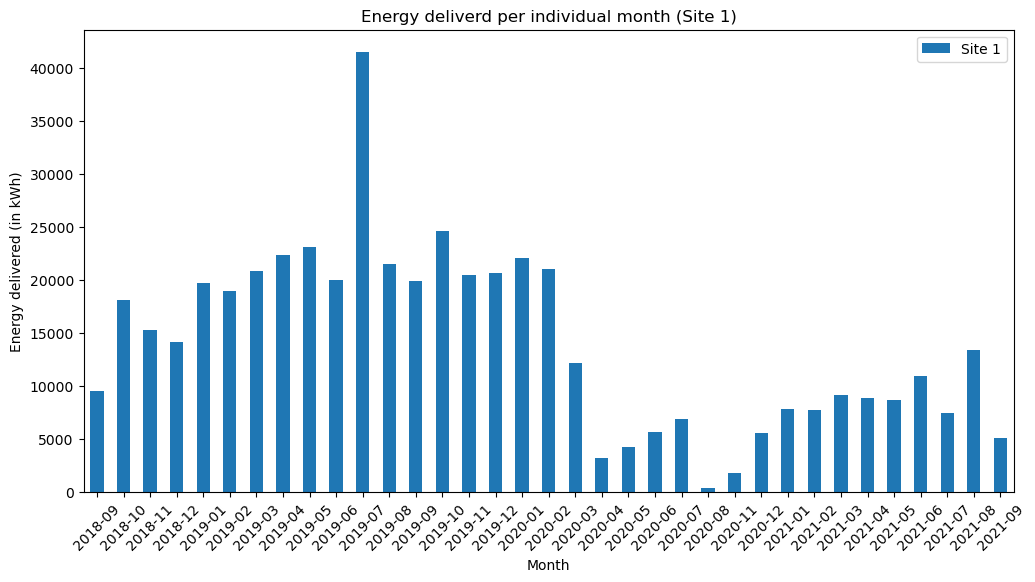

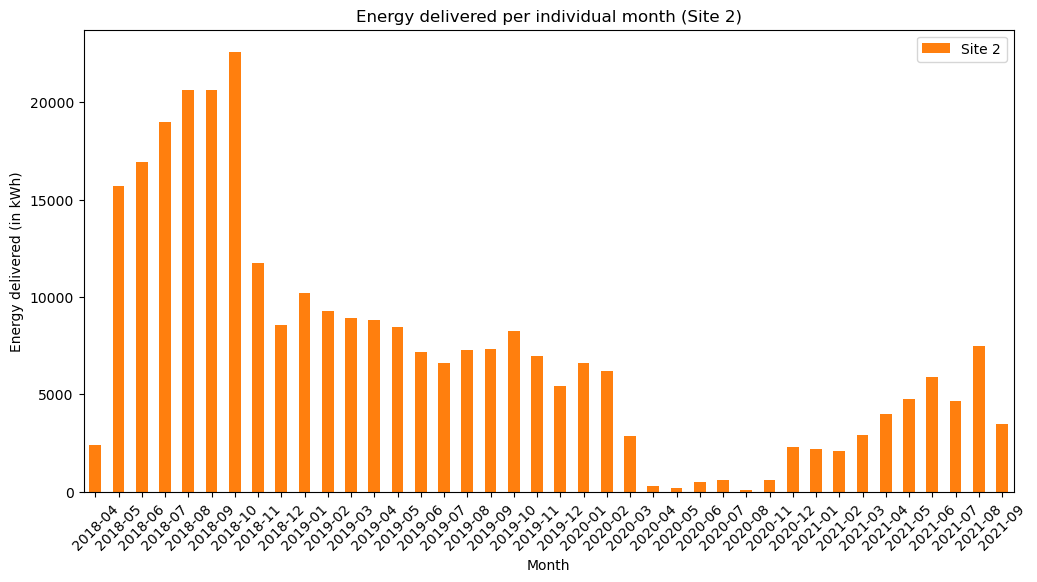

In [60]:
df1_single_months = df1.groupby(df1['connectionTime'].dt.to_period('M'))["kWhDelivered"].sum()
df2_single_months = df2.groupby(df2['connectionTime'].dt.to_period('M'))["kWhDelivered"].sum()


df1_single_months.plot(kind='bar', figsize=(12, 6), label="Site 1")
plt.xlabel("Month")
plt.ylabel("Energy delivered (in kWh)")
plt.title("Energy deliverd per individual month (Site 1)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

df2_single_months.plot(kind='bar', figsize=(12, 6), color="tab:orange", label="Site 2")
plt.xlabel("Month")
plt.ylabel("Energy delivered (in kWh)")
plt.title("Energy delivered per individual month (Site 2)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Energy delivered per session per month**

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


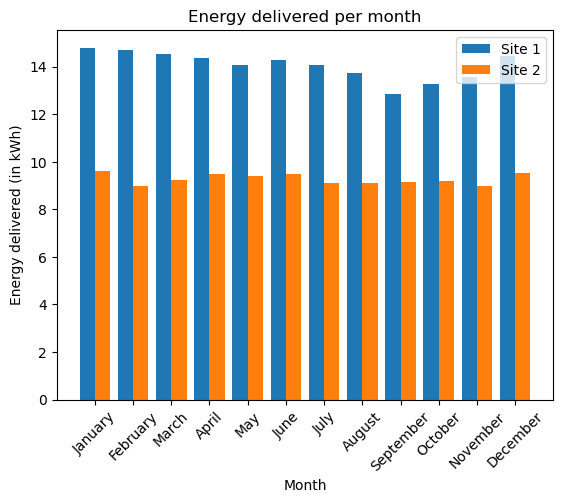

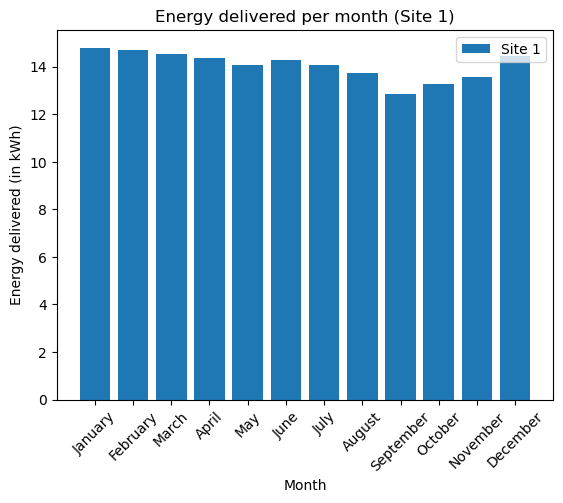

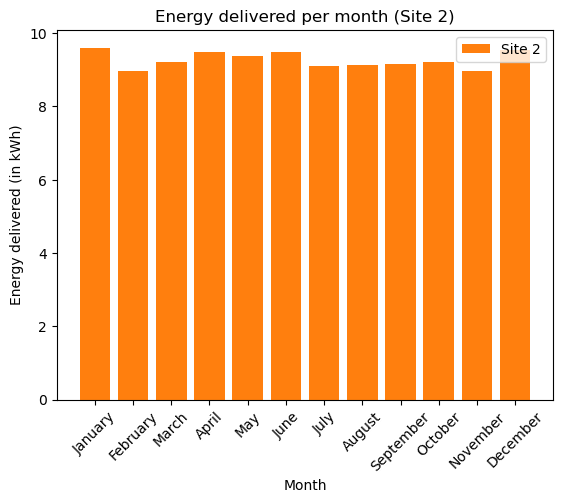

In [63]:
x = np.arange(len(months))
y1 = df1_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"] / df1_grouped_month[["month"]].size()
y2 = df2_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"] / df2_grouped_month[["month"]].size()

# Show both sites together
ax2 = plt.subplot()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Energy delivered per month")
ax2.set_xlabel("Month")
ax2.set_xticks(x)
ax2.set_xticklabels(months, rotation=45)
ax2.set_ylabel("Energy delivered (in kWh)")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))
plt.show()

# Only show site 1
#plt.plot(x, y1)
plt.bar(x, y1, label="Site 1")
plt.xlabel("Month")
plt.ylabel("Energy delivered (in kWh)")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.title("Energy delivered per month (Site 1)")
plt.legend()
plt.show()

# Only show site 2
#plt.plot(x, y2)
plt.bar(x, y2, label="Site 2", color="tab:orange")
plt.xlabel("Month")
plt.ylabel("Energy delivered (in kWh)")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.title("Energy delivered per month (Site 2)")
plt.legend()
plt.show()